<a href="https://colab.research.google.com/github/gauravguptagtm/100-days-of-deep-learning/blob/main/DL_26(Visualizing_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.applications.vgg16 import VGG16

In [2]:
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [5]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filter, biases = model.layers[i].get_weights()
  print("layer number", i, model.layers[i].name, filter.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [6]:
filter, biases = model.layers[1].get_weights()

In [7]:
f_min, f_max = filter.min(), filter.max()
filters = (filter - f_min)/ (f_max-f_min)

In [9]:
import matplotlib.pyplot as plt

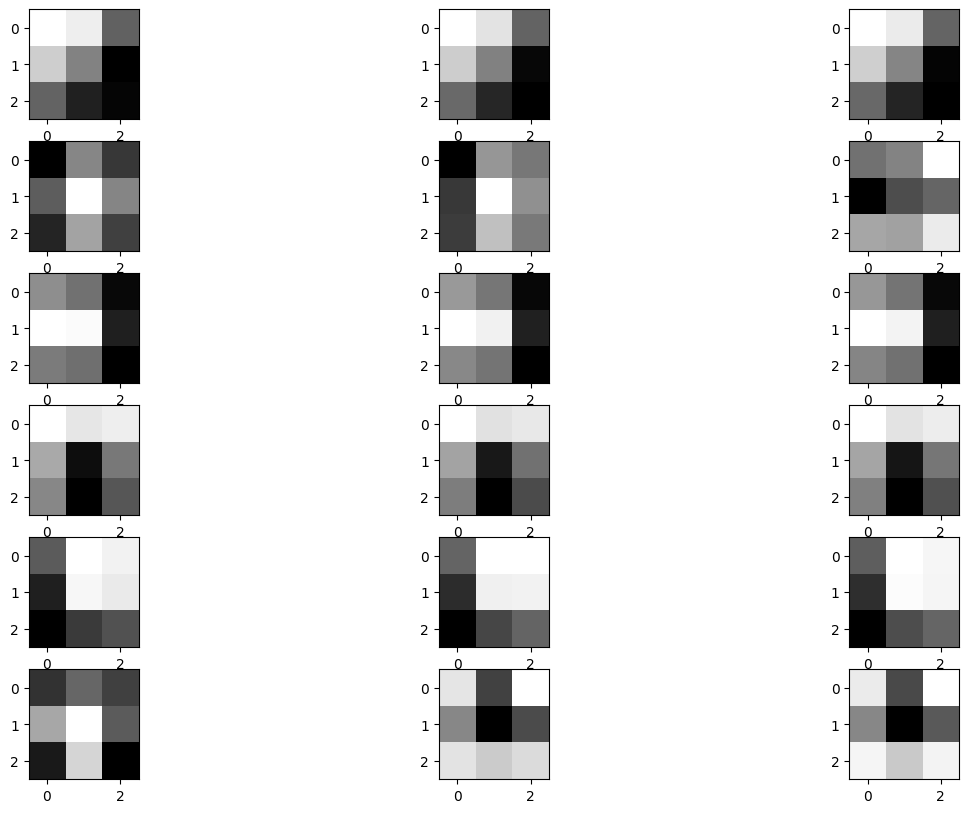

In [10]:
n_filters = 6
ix = 1
fig = plt.figure(figsize=(15, 10))
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    plt.subplot(n_filters, 3 , ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix+=1
plt.show()


In [17]:
from keras import Model
import tensorflow as tf

In [16]:
model = Model(inputs = model.inputs, outputs = model.layers[1].output)


In [20]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

In [21]:
image = load_img("/content/images.jpeg", target_size=(224, 224))

image = img_to_array(image)

image = tf.expand_dims(image, axis=0)
image = preprocess_input(image)

1/1 [==============================] - 0s 118ms/step


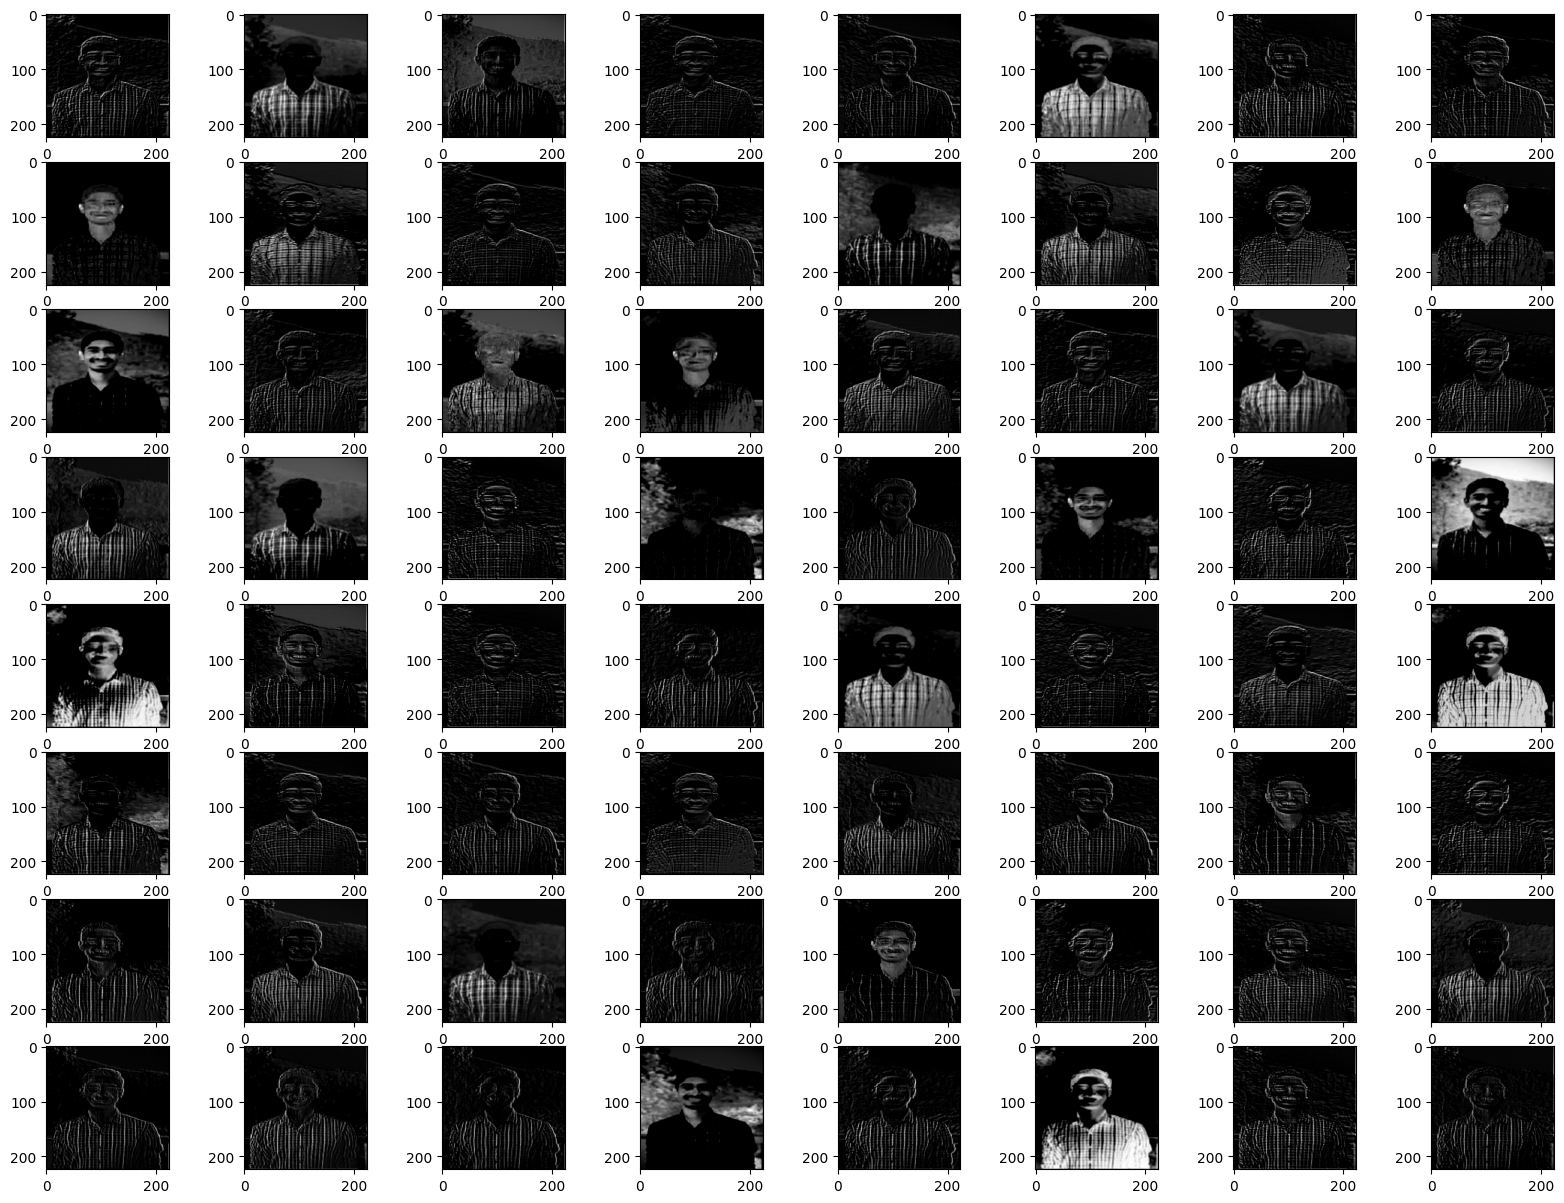

In [23]:
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1, features.shape[3]+1):
  plt.subplot(8,8,i)
  plt.imshow(features[0,:,:, i-1], cmap='gray')

plt.show()